In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import classification_report

In [2]:
weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/Dataset-weather-prediction-dataset-processed (2).csv'
pleasant_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'

In [3]:
weather_data = pd.read_csv(weather_data_path)
pleasant_data = pd.read_csv(pleasant_data_path)

In [4]:
print(weather_data.head())
print(pleasant_data.head())

       DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0 

I would choose RNN because LSTM units in recurrent neural networks (RNNs) can capture long-term dependencies and handle sequences well, they are perfect for weather data analysis. They are especially useful for long-term weather pattern prediction because they are resilient to gaps and irregularities in the data.


In [5]:
# def build_rnn_model(input_shape):
#     model = Sequential()
    
#     model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
#     model.add(Dropout(0.2))  
    
#     model.add(LSTM(units=50))
#     model.add(Dropout(0.2))
    
#     model.add(Dense(1, activation='sigmoid'))
    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model


In [6]:
weather_data.drop(columns=['DATE', 'MONTH'], inplace=True)

pleasant_data.drop(columns=['DATE'], inplace=True)

In [7]:
print(weather_data.head())

   BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0                  7               2.1            0.85           1.018   
1                  6               2.1            0.84           1.018   
2                  8               2.1            0.90           1.018   
3                  3               2.1            0.92           1.018   
4                  6               2.1            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                    0.32                 0.09                 0   
1                    0.36                 1.05                 0   
2                    0.18                 0.30                 0   
3                    0.58                 0.00                 0   
4                    0.65                 0.14                 0   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0             0.7              6.5             0.8  ...          

In [8]:
print(pleasant_data.head())

   BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4              

In [9]:
weather_data.isnull().sum().sum()

0

In [10]:
pleasant_columns = list(pleasant_data.columns)
station_names = [x.split("_")[0] for x in pleasant_columns]

In [11]:
len(station_names)

15

In [12]:
cols_to_keep = []
for col in station_names:
    for weather_col in weather_data.columns:
        if col in weather_col:
            cols_to_keep.append(weather_col)

In [13]:
len(cols_to_keep)

147

In [14]:
basel_cols = [col for col in cols_to_keep if 'BASEL' in col]
belgrade_cols = [col for col in cols_to_keep if 'BELGRADE' in col]
stockholm_cols = [col for col in cols_to_keep if 'STOCKHOLM' in col]

In [15]:
basel_cols

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [16]:
belgrade_cols

['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']

In [17]:
stockholm_cols

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [18]:
weather_attributes=[col.replace('BELGRADE_', '') for col in belgrade_cols]

In [19]:
weather_attributes

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [20]:
new_cols_to_keep = []
for col in cols_to_keep:
    if 'wind_speed' in col or 'snow_depth' in col:
        print(col)
        continue
    else:
        new_cols_to_keep.append(col)

BASEL_wind_speed
BASEL_snow_depth
DEBILT_wind_speed
DUSSELDORF_wind_speed
DUSSELDORF_snow_depth
HEATHROW_snow_depth
KASSEL_wind_speed
LJUBLJANA_wind_speed
MAASTRICHT_wind_speed
MADRID_wind_speed
MUNCHENB_snow_depth
OSLO_wind_speed
OSLO_snow_depth
SONNBLICK_wind_speed
VALENTIA_snow_depth


In [21]:
len(new_cols_to_keep)

132

In [22]:
station_dic = {station:0 for station in station_names}
for station in station_names:
    for col in cols_to_keep:
        if station in col:
            station_dic[station]+=1
            

In [23]:
station_dic

{'BASEL': 11,
 'BELGRADE': 9,
 'BUDAPEST': 9,
 'DEBILT': 10,
 'DUSSELDORF': 11,
 'HEATHROW': 10,
 'KASSEL': 9,
 'LJUBLJANA': 10,
 'MAASTRICHT': 10,
 'MADRID': 10,
 'MUNCHENB': 9,
 'OSLO': 11,
 'SONNBLICK': 10,
 'STOCKHOLM': 8,
 'VALENTIA': 10}

In [24]:
attribute_dic = {attribute:0 for attribute in weather_attributes}
for attribute in weather_attributes:
    for col in cols_to_keep:
        if attribute in col:
            attribute_dic[attribute]+=1
            

In [25]:
attribute_dic

{'cloud_cover': 14,
 'humidity': 14,
 'pressure': 14,
 'global_radiation': 15,
 'precipitation': 15,
 'sunshine': 15,
 'temp_mean': 15,
 'temp_min': 15,
 'temp_max': 15}

In [26]:
ljubljana_cols = [col for col in cols_to_keep if 'LJUBLJANA' in col]

In [27]:
ljubljana_cols

['LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']

In [28]:
kassel_cols = [col for col in cols_to_keep if 'KASSEL' in col]

In [29]:
kassel_cols

['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max']

In [30]:
weather_data = weather_data[new_cols_to_keep]

In [31]:
weather_data['KASSEL_cloud_cover']=weather_data['LJUBLJANA_cloud_cover']

In [32]:
munchen_cols = [col for col in cols_to_keep if 'MUNCHEN' in col]

In [33]:
munchen_cols

['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']

In [34]:
weather_data['MUNCHENB_pressure']=weather_data['SONNBLICK_pressure']

In [35]:
stockholm_cols = [col for col in cols_to_keep if 'STOCKHOLM' in col]

In [36]:
stockholm_cols

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [37]:
weather_data['STOCKHOLM_humidity']=weather_data['OSLO_humidity']

In [38]:
weather_data.shape

(22950, 135)

In [39]:
save_path = r'C:\Users\kuohe\ClimateWins\02 Data\cleaned_weather_data.csv'
weather_data.to_csv(save_path, index=False)
print(f"Data has been successfully saved to {save_path}")

Data has been successfully saved to C:\Users\kuohe\ClimateWins\02 Data\cleaned_weather_data.csv


In [40]:
cleaned_weather_data = 'C:/Users/kuohe/ClimateWins/02 Data/cleaned_weather_data.csv'
cleaned_weather_data = pd.read_csv(cleaned_weather_data)

In [41]:
pleasant_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'
pleasant_weather_data = pd.read_csv(pleasant_weather_data_path)

In [42]:
pleasant_weather_data.drop(columns=['DATE'], inplace=True)

In [43]:
X = cleaned_weather_data.values.reshape(-1,15,9)
y = pleasant_weather_data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [45]:
model = Sequential()
model.add(Conv1D(100, kernel_size=2, activation='relu', input_shape=(15,9)))
model.add(Dense(50, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(15, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0000001), metrics=['accuracy'])
model.summary()

C:\Users\kuohe\anaconda2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 14, 100)        │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         5,265 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,215 (47.71 KB)

 Trainable params: 12,215 (47.71 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train,y_train,batch_size=16, epochs=100,verbose=1)
acc = model.evaluate(X_train,y_train)
print('Loss:', acc[0], 'Accuracy', acc[1])

Epoch 1/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0559 - loss: 19.8574
Epoch 2/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0607 - loss: 18.9238
Epoch 3/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0667 - loss: 18.7365
Epoch 4/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0749 - loss: 18.0676
Epoch 5/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0836 - loss: 17.8838
Epoch 6/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0846 - loss: 17.6904
Epoch 7/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0926 - loss: 17.0678
Epoch 8/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0995 - loss: 16.6160
Epoch 9/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1073 - loss: 16.6154
Epoch 10/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1103 - loss: 16.1264
Epoch 11/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1191 - loss: 16.3047
Epoch 12

1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1885 - loss: 15.7173
Epoch 67/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1835 - loss: 15.4477
Epoch 68/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1866 - loss: 15.7192
Epoch 69/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1871 - loss: 15.6384
Epoch 70/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1856 - loss: 15.9321
Epoch 71/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1873 - loss: 15.9858
Epoch 72/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1903 - loss: 15.8484
Epoch 73/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1812 - loss: 16.0505
Epoch 74/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1818 - loss: 16.1384
Epoch 75/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1813 - loss: 15.9451
Epoch 76/100
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1856 - loss: 16.0404
Epoch 77/100

In [47]:
# def create_rnn_model(input_shape, n_classes):
#     model = Sequential([
#         LSTM(units=300, return_sequences=False, input_shape=input_shape),
#         LSTM(units=200, return_sequences=False),
#         Dropout(0.2),
#         Dense(units=100, activation='sigmoid'),
#         Dropout(0.2),
#         Dense(units=n_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [50]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.14      0.23      2931
           1       0.27      0.47      0.34       907
           2       0.00      0.00      0.00       174
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        12
           7       0.01      0.08      0.02        53
           8       0.00      0.00      0.00         6
           9       0.09      0.35      0.14       336
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3

    accuracy                           0.21      4590
   macro avg       0.08      0.07      0.05      4590
weighted avg    

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


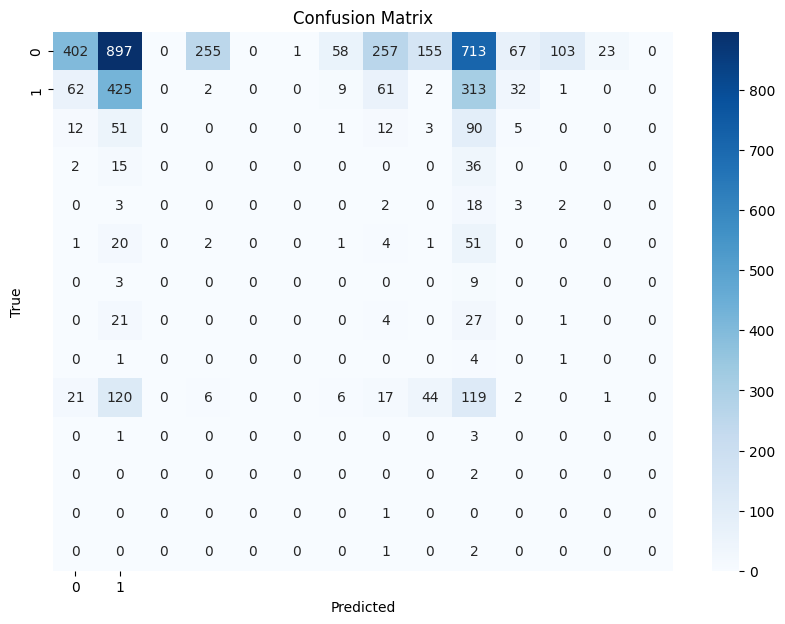

In [52]:
y_test = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# EXERICSE 2.4 Part 2

In [53]:
import os
import time
import warnings
from math import floor
import operator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import classification_report

# Suppress warnings
warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option("display.max_columns", None)


In [54]:
cleaned_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/cleaned_weather_data.csv'
pleasant_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'

In [55]:
cleaned_weather_data = pd.read_csv(cleaned_weather_data_path)
pleasant_weather_data = pd.read_csv(pleasant_weather_data_path)

In [56]:
X = cleaned_weather_data.values.reshape(-1, 15, 9)
y = pleasant_weather_data.drop('DATE', axis=1).values

In [57]:
y = np.argmax(y, axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (22950, 15, 9)
y shape: (22950,)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train = np.random.rand(100, 10, 1)  
y_train = np.random.randint(0, 2, 100) 
timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_classes = 2

#scoring function
score_accuracy = make_scorer(accuracy_score)

def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU, 'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_accuracy, cv=kfold, fit_params={'callbacks': [es]}).mean()
    return score

# Define the parameter bounds for Bayesian Optimization
params = {
    'neurons': (10, 100),
    'activation': (0, 8),
    'kernel': (1, 5),
    'optimizer': (0, 7),
    'learning_rate': (0.0001, 0.1),
    'batch_size': (10, 100),
    'epochs': (10, 50),
    'layers1': (1, 5),
    'layers2': (1, 5),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0.1, 0.5)
}

start = time.time()
nn_opt = BayesianOptimization(f=bay_area, pbounds=params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4)
print('Search took %s minutes' % ((time.time() - start) / 60))


|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/16
1/1 - 2s - 2s/step - accuracy: 0.4500 - loss: 0.6997
Epoch 2/16
1/1 - 0s - 28ms/step - accuracy: 0.5500 - loss: 0.6919
Epoch 3/16
1/1 - 0s - 30ms/step - accuracy: 0.5500 - loss: 0.6913
Epoch 4/16
1/1 - 0s - 34ms/step - accuracy: 0.5500 - loss: 0.6907
Epoch 5/16
1/1 - 0s - 28ms/step - accuracy: 0.5500 - loss: 0.6903
Epoch 6/16
1/1 - 0s - 28ms/step - accuracy: 0.5500 - loss: 0.6899
Epoch 7/16
1/1 - 0s - 28ms/step - accuracy: 0.5500 - loss: 0.6896
Epoch 8/16
1/1 - 0s - 29ms/step - accuracy: 0.5500 - loss: 0.6893
Epoch 9/16
1/1 - 0s - 29ms/step - accuracy: 0.5500 - loss: 0.6891
Epoch 10/16
1/1 - 0s - 27ms/step - accuracy: 0.5500 - loss: 0.6890
E

2/2 - 0s - 77ms/step
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
| 4         | nan       | 2.437     | 18.79     | 0.6842    | 0.2761    | 14.88     | 2.981     | 1.138     | 4.637     | 0.02595   | 69.63     | 0.3117    | 3.64      |
Epoch 1/48
3/3 - 1s - 455ms/step - accuracy: 0.5625 - loss: 0.7379
Epoch 2/48
3/3 - 0s - 9ms/step - accuracy: 0.4375 - loss: 1.0559
Epoch 3/48
3/3 - 0s - 11ms/step - accuracy: 0.4875 - loss: 0.7309
Epoch 4/48
3/3 - 0s - 11ms/step - accuracy: 0.4500 - loss: 0.8307
Epoch 5/48
3/3 - 0s - 11ms/step - accuracy: 0.5625 - loss: 0.6944
Epoch 6/48
3/3 - 0s - 10ms/step - accuracy: 0.4875 - loss: 0.6703
Epoch 7/48
3/3 - 0s - 9ms/step - accuracy: 0.4250 - loss: 0.7586
Epoch 8/48
3/3 - 0s - 8ms/step - accuracy: 0.4625 - loss: 0.7061
Epoch 9/48
3/3 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.6829
Epoch 10/48
3/3 - 0s - 11ms/step - accuracy: 0.5750 - loss: 0.6868
Epoch 11/48
3/3 - 0s - 11ms/step - accuracy: 0.4625 - loss: 0.7460
Epoch 12/48
3/3 - 0s - 11ms/step - accur

Epoch 40/41
1/1 - 0s - 23ms/step - accuracy: 0.5500 - loss: 0.6772
Epoch 41/41
1/1 - 0s - 27ms/step - accuracy: 0.5625 - loss: 0.6790
1/1 - 0s - 68ms/step
Epoch 1/41
Epoch 1/41
Epoch 1/41
Epoch 1/41
| 7         | nan       | 0.04418   | 83.39     | 0.7069    | 0.3916    | 40.85     | 1.296     | 2.434     | 1.463     | 0.08632   | 66.1      | 0.3309    | 0.4449    |
Epoch 1/45
3/3 - 2s - 520ms/step - accuracy: 0.4500 - loss: 1.1880
Epoch 2/45
3/3 - 0s - 13ms/step - accuracy: 0.4500 - loss: 1.0776
Epoch 3/45
3/3 - 0s - 11ms/step - accuracy: 0.4500 - loss: 1.0216
Epoch 4/45
3/3 - 0s - 10ms/step - accuracy: 0.4500 - loss: 0.9713
Epoch 5/45
3/3 - 0s - 11ms/step - accuracy: 0.4500 - loss: 0.8974
Epoch 6/45
3/3 - 0s - 9ms/step - accuracy: 0.4500 - loss: 0.8137
Epoch 7/45
3/3 - 0s - 9ms/step - accuracy: 0.4500 - loss: 0.7622
Epoch 8/45
3/3 - 0s - 11ms/step - accuracy: 0.4500 - loss: 0.7471
Epoch 9/45
3/3 - 0s - 10ms/step - accuracy: 0.4500 - loss: 0.7229
Epoch 10/45
3/3 - 0s - 11ms/step - acc

1/1 - 1s - 1s/step - accuracy: 0.5500 - loss: 0.6886
Epoch 2/19
1/1 - 0s - 21ms/step - accuracy: 0.4500 - loss: 0.7051
Epoch 3/19
1/1 - 0s - 30ms/step - accuracy: 0.5500 - loss: 0.6800
Epoch 4/19
1/1 - 0s - 27ms/step - accuracy: 0.6000 - loss: 0.6706
Epoch 5/19
1/1 - 0s - 28ms/step - accuracy: 0.6000 - loss: 0.6639
Epoch 6/19
1/1 - 0s - 26ms/step - accuracy: 0.5875 - loss: 0.6585
Epoch 7/19
1/1 - 0s - 24ms/step - accuracy: 0.6000 - loss: 0.6528
Epoch 8/19
1/1 - 0s - 24ms/step - accuracy: 0.6250 - loss: 0.6467
Epoch 9/19
1/1 - 0s - 28ms/step - accuracy: 0.6625 - loss: 0.6405
Epoch 10/19
1/1 - 0s - 22ms/step - accuracy: 0.6750 - loss: 0.6339
Epoch 11/19
1/1 - 0s - 27ms/step - accuracy: 0.6875 - loss: 0.6272
Epoch 12/19
1/1 - 0s - 30ms/step - accuracy: 0.7250 - loss: 0.6201
Epoch 13/19
1/1 - 0s - 30ms/step - accuracy: 0.7000 - loss: 0.6138
Epoch 14/19
1/1 - 0s - 30ms/step - accuracy: 0.7375 - loss: 0.6083
Epoch 15/19
1/1 - 0s - 33ms/step - accuracy: 0.6750 - loss: 0.6068
Epoch 16/19
1/1 -

Epoch 17/30
2/2 - 0s - 14ms/step - accuracy: 0.5500 - loss: 0.6882
Epoch 18/30
2/2 - 0s - 15ms/step - accuracy: 0.5500 - loss: 0.6880
Epoch 19/30
2/2 - 0s - 17ms/step - accuracy: 0.5500 - loss: 0.6882
Epoch 20/30
2/2 - 0s - 17ms/step - accuracy: 0.5500 - loss: 0.6880
Epoch 21/30
2/2 - 0s - 15ms/step - accuracy: 0.5500 - loss: 0.6916
Epoch 22/30
2/2 - 0s - 15ms/step - accuracy: 0.5500 - loss: 0.6908
Epoch 23/30
2/2 - 0s - 15ms/step - accuracy: 0.5500 - loss: 0.6894
Epoch 24/30
2/2 - 0s - 15ms/step - accuracy: 0.5500 - loss: 0.6895
Epoch 25/30
2/2 - 0s - 14ms/step - accuracy: 0.5500 - loss: 0.6897
Epoch 26/30
2/2 - 0s - 14ms/step - accuracy: 0.5500 - loss: 0.6890
Epoch 27/30
2/2 - 0s - 18ms/step - accuracy: 0.5500 - loss: 0.6887
Epoch 28/30
2/2 - 0s - 17ms/step - accuracy: 0.5500 - loss: 0.6883
Epoch 29/30
2/2 - 0s - 14ms/step - accuracy: 0.5500 - loss: 0.6881
Epoch 30/30
2/2 - 0s - 14ms/step - accuracy: 0.5500 - loss: 0.6888
1/1 - 0s - 100ms/step
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1

ValueError: Input y contains NaN.

In [60]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
optimum['activation'] = activationL[round(optimum['activation'])]
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum['kernel'] = round(optimum['kernel'])
optimum

{'activation': 'softsign',
 'batch_size': 96,
 'dropout': 0.7319939418114051,
 'dropout_rate': 0.3394633936788146,
 'epochs': 16,
 'kernel': 2,
 'layers1': 1,
 'layers2': 4,
 'learning_rate': 0.060151389673146566,
 'neurons': 74,
 'normalization': 0.020584494295802447,
 'optimizer': <keras.src.optimizers.ftrl.Ftrl at 0x2af3476f190>}

In [61]:
####Need to add learning rate to the optimizer type??
epochs = optimum["epochs"]
batch_size = optimum["batch_size"]
#n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 #_count_classes(Y_train)
layers1 = optimum["layers1"]
layers2 = optimum["layers2"]
activation = optimum["activation"]
kernel = optimum["kernel"]
neurons = optimum["neurons"]
normalization = optimum["normalization"]
dropout = optimum["dropout"]
dropout_rate = optimum["dropout_rate"]
optimizer = optimum["optimizer"]

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
if normalization > 0.5:
    model.add(BatchNormalization())
for i in range(layers1):
    model.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    model.add(Dropout(dropout_rate, seed=123))
for i in range(layers2):
    model.add(Dense(neurons, activation=activation))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) #softmax sigmoid
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary_crossentropy

In [72]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.09      0.16      2955
           1       0.18      0.61      0.28       879
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00        64
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        46
           8       0.00      0.14      0.00         7
           9       0.09      0.04      0.06       360
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1

    accuracy                           0.18      4590
   macro avg       0.08      0.06      0.04      4590
weighted avg    

AxisError: axis 1 is out of bounds for array of dimension 1